# Manual switching of the torque

We now investigate a single simple manual switch of the EM torque. This is for both
components: the anomalous and spindown torque. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
%matplotlib inline

plt.style.use("thesis")

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

c = 3e10
R = 1e6

## Parameters constant for all simulations

In [2]:
# Parameters
chi0 = 60.1
epsI3 = 1e-5
epsA = 2e-6
omega0 = 1.5e1
tauP = 2 * np.pi/(epsI3 * omega0)
T = 10.2 * tauP

# Switch Parameters
AnomTorqueSwitching=False
SwitchTime = T/2.
upsilon = 0.005

# Set it to minimal precession
beta = np.degrees(Physics_Functions.Beta_Function(epsI3, epsA, chi0))
P = 2 * np.pi / omega0
tauS =  3 * c / (2 * R * epsA * omega0**2)
spindown_angle = P / (tauS * epsI3)
a0 = beta #- np.degrees(spindown_angle)

# Simulation parameters
n = 500000
error = 1e-11

noise=None

BETA FUNCTION IS USED
Assuming chi has been given in degrees rather than radians


## No switching

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 2.6832815730e+15
DeltaPhi_49 : 2.4086852833e-04
DeltaPhi_49_SpindownTorque : 2.4086852842e-04
DeltaPhi_63 : 2.4282367730e-03
DeltaPhi_75 : 4.4221847784e-07
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 3.1670932106e+01
P : 4.1887902048e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 2.1400000000e+05
T : 4.2700000000e+05
a0 : -4.4628286106e+00
beta : -4.4628286106e+00
beta30 : -5.4466973246e+00
beta75 : -2.4359604999e+00
chi0 : 6.0100000000e+01
delta_omega_dot0_EM : 2.3873241464e-08
delta_omega_dot0_FP : -1.0077601974e-09
delta_omega_dot0_FP_EM : -1.0159402670e-08
epsA : 2.0000000000e-06
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -1.7940979055e-08
omega0 : 1.5000000000e+01
omega_dot0 : -1.1272649600e-07
source_script : Unknown
tauA : 2.0943951024e+05
tauE : 1.3306543300e+08
tauP : 4.2015288794e+04
tauS : 1

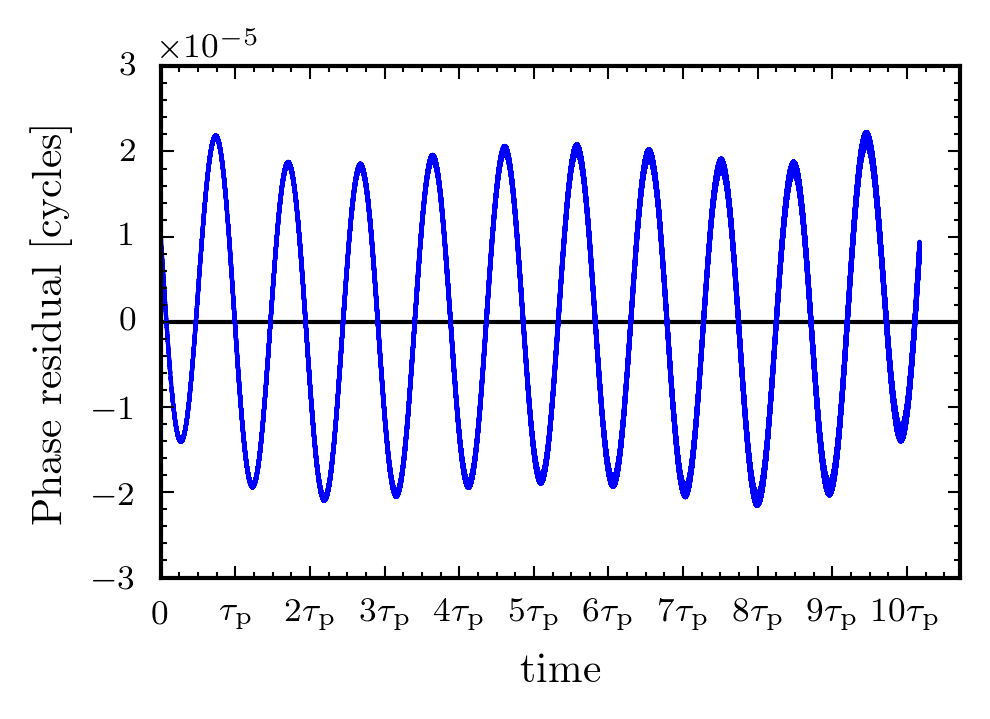

BETA FUNCTION IS USED
BETA FUNCTION IS USED


In [3]:
upsilonOFF = 0

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilonOFF)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.PhaseResidual(file_name, order=4, noise=noise, color="b")
#ax1.legend()
plt.tight_layout()
plt.savefig("img/NoSwitching.pdf")
plt.show()

File_Functions.PropertiesTable(file_name, "NoSwitching")


In [12]:
PD = File_Functions.Parameter_Dictionary(file_name)
PD['omega0'] / float(PD['tauS']) / (2*np.pi) * PD['DeltaPhi_63']

BETA FUNCTION IS USED
BETA FUNCTION IS USED


5.797e-11

## Switching: without Anomalous torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 0.0000000000e+00
Bs : 2.6832815730e+15
DeltaPhi_49 : 2.4086852833e-04
DeltaPhi_49_SpindownTorque : 2.4086852842e-04
DeltaPhi_63 : 2.4282367730e-03
DeltaPhi_75 : 4.4221847784e-07
DeltaPhi_TS : -5.1383273222e+02
EMtorqueAmplificationfactor : 3.1670932106e+01
P : 4.1887902048e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 2.1400000000e+05
T : 4.2700000000e+05
a0 : -4.4628286106e+00
beta : -4.4628286106e+00
beta30 : -5.4466973246e+00
beta75 : -2.4359604999e+00
chi0 : 6.0100000000e+01
delta_omega_dot0_EM : 2.3873241464e-08
delta_omega_dot0_FP : -1.0077601974e-09
delta_omega_dot0_FP_EM : -1.0159402670e-08
epsA : 2.0000000000e-06
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -1.7940979055e-08
omega0 : 1.5000000000e+01
omega_dot0 : -1.1272649600e-07
source_script : Unknown
tauA : 2.0943951024e+05
tauE : 1.3306543300e+08
tauP : 4.2015288794e+04
tauS : 1

/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.dev1-py2.7-linux-x86_64.egg/matplotlib/axes/_axes.py:490: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


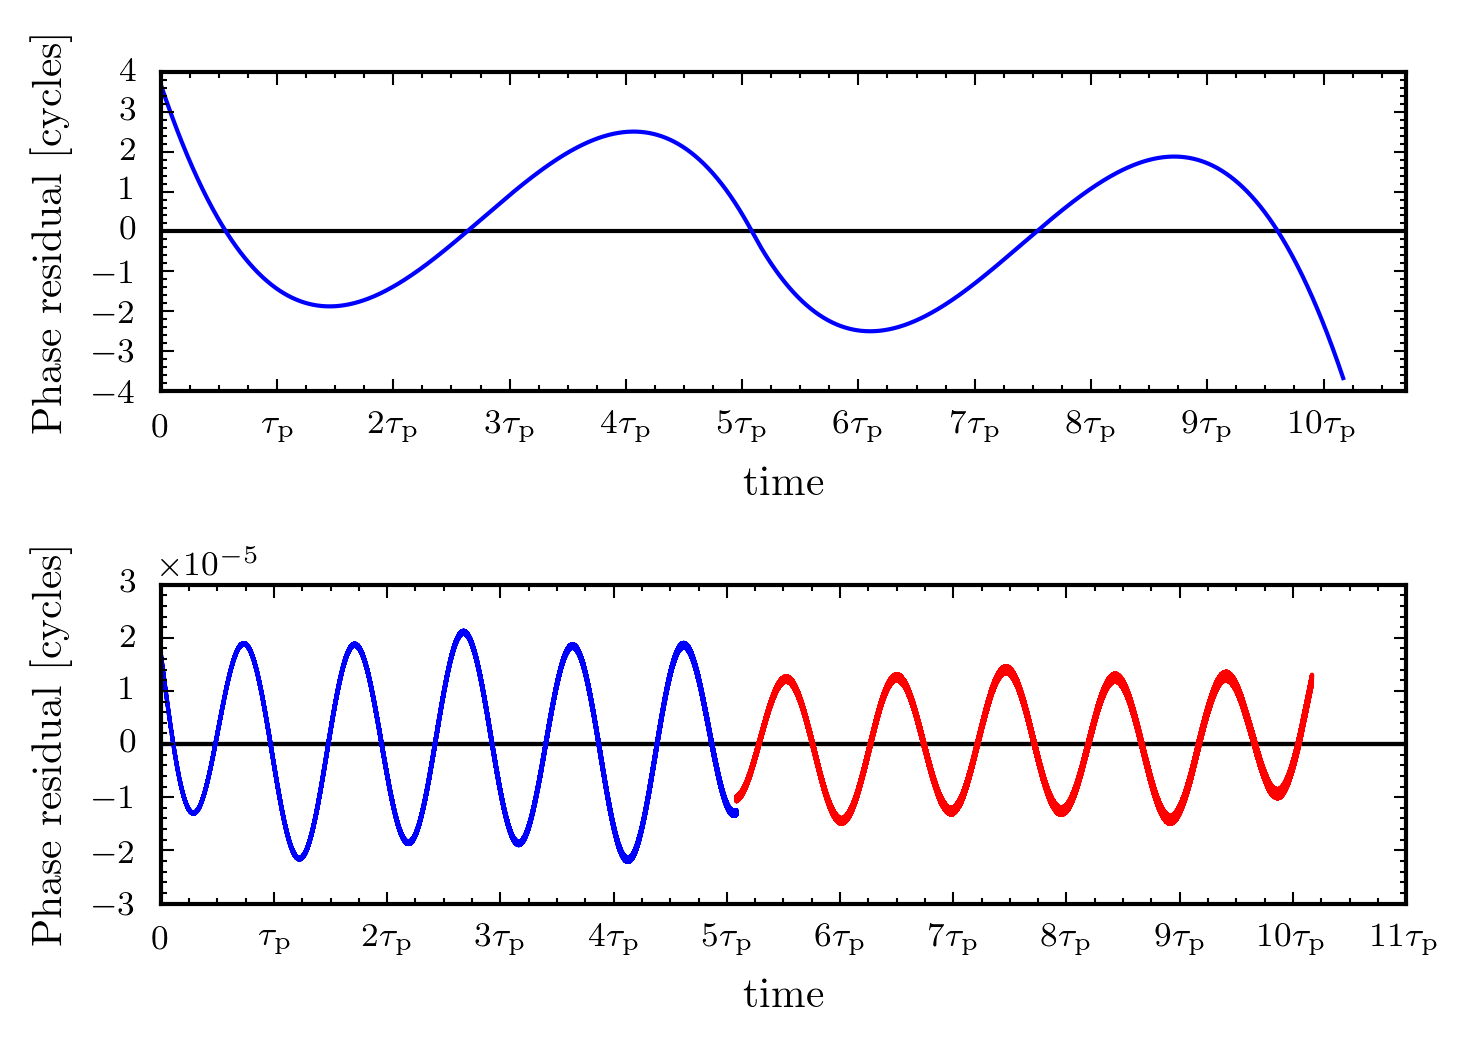

In [4]:
AnomTorqueSwitching=False
upsilon = 0.4

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilon, 
                 AnomTorqueSwitching=AnomTorqueSwitching)

File_Functions.PrintParameterDictionary(file_name)


fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))
ax1 = Plot.PhaseResidual(file_name, ax=ax1, noise=noise, color="b", order=4)
leg = plt.legend()

ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="b",
                           tstart=0, tend=SwitchTime, order=4)
ax2 = Plot.PhaseResidual(file_name, ax=ax2,  noise=noise, color="r",
                         tstart=SwitchTime, tend=None, order=4)
plt.tight_layout()
plt.savefig("img/SwitchingWithoutAnomTorque.pdf")
plt.show()

## Switching: with anomalous torque

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 2.6832815730e+15
DeltaPhi_49 : 2.4086852833e-04
DeltaPhi_49_SpindownTorque : 2.4086852842e-04
DeltaPhi_63 : 2.4282367730e-03
DeltaPhi_75 : 4.4221847784e-07
DeltaPhi_TS : -1.2845818305e+01
EMtorqueAmplificationfactor : 3.1670932106e+01
P : 4.1887902048e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 2.1400000000e+05
T : 4.2700000000e+05
a0 : -4.4628286106e+00
beta : -4.4628286106e+00
beta30 : -5.4466973246e+00
beta75 : -2.4359604999e+00
chi0 : 6.0100000000e+01
delta_omega_dot0_EM : 2.3873241464e-08
delta_omega_dot0_FP : -1.0077601974e-09
delta_omega_dot0_FP_EM : -1.0159402670e-08
epsA : 2.0000000000e-06
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 5.0000000000e+05
nu_dot0 : -1.7940979055e-08
omega0 : 1.5000000000e+01
omega_dot0 : -1.1272649600e-07
source_script : Unknown
tauA : 2.0943951024e+05
tauE : 1.3306543300e+08
tauP : 4.2015288794e+04
tauS : 1

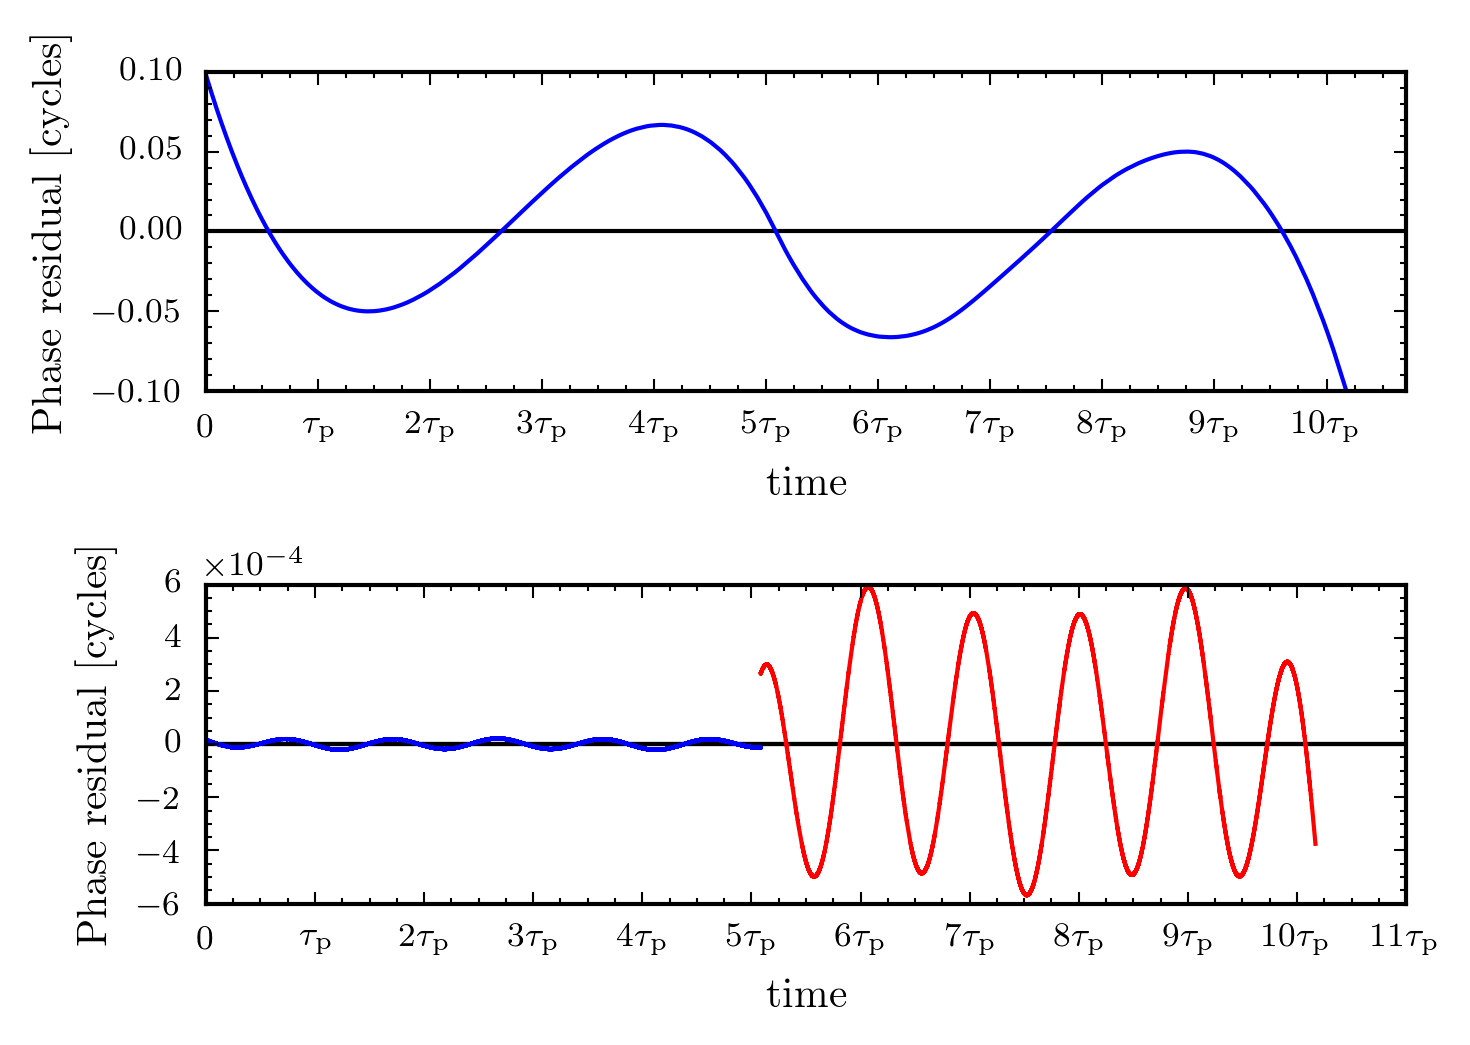

In [5]:
AnomTorqueSwitching=True
upsilon = 0.01
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 SwitchTime=SwitchTime, upsilon=upsilon, 
                 AnomTorque=AnomTorqueSwitching)

File_Functions.PrintParameterDictionary(file_name)

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))
ax1 = Plot.PhaseResidual(file_name, ax=ax1, noise=noise, color="b", order=4)
leg = plt.legend()

ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="b", order=4,
                         tstart=0, tend=SwitchTime)
ax2 = Plot.PhaseResidual(file_name, ax=ax2, noise=noise, color="r", order=4,
                         tstart=SwitchTime, tend=None)

plt.tight_layout()
plt.savefig("img/SwitchingWithAnomTorque.pdf")
plt.show()